In [13]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [23]:
exp_path = Path().absolute().parent.parent.joinpath('BFP/src/experiments/0024_sanity_check_Everycenter_30epr1fr_BALANCED')
optimam_path = Path().absolute().parent.parent.joinpath('BFP/src/client_logs/optimam')
bcdr_path = Path().absolute().parent.parent.joinpath('BFP/src/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath('BFP/src/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath('BFP/src/client_logs/cmmd')

In [31]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(optimam_path.joinpath(pickle_file), 'rb') as handle:
    optimam_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [25]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [26]:
aggregated_metrics['accuracies_aggregated']

[0.670109395109395]

In [27]:
optimam_metrics.keys()

dict_keys(['local_loss', 'local_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'local_true_positives', 'local_false_positives', 'local_false_negatives', 'local_true_negatives'])

In [28]:
optimam_metrics['local_val_loss']

{0: []}

In [33]:
inbreast_metrics['local_loss']

{0: [0.6593803763389587,
  0.8103154301643372,
  0.6082522869110107,
  0.7287551760673523,
  0.6363247036933899,
  0.5892325639724731,
  0.5501851439476013,
  0.5078692436218262,
  0.5249414443969727,
  0.6755378246307373,
  2.143693685531616,
  0.9283223152160645,
  1.055700659751892,
  10.559627532958984,
  0.6870673298835754,
  0.9872264266014099,
  0.29089128971099854,
  0.4279891550540924,
  0.2974512577056885,
  0.5197098255157471,
  0.1319233626127243,
  0.02381478250026703,
  0.04585299640893936,
  0.01844809204339981,
  0.025888917967677116,
  0.012332305312156677,
  0.0073725455440580845,
  0.004618621896952391,
  0.0031365149188786745,
  0.002430347492918372],
 1: []}

In [32]:
cmmd_metrics['local_loss']

{0: [0.345918208360672,
  0.4137171506881714,
  0.3277084529399872,
  0.2851947247982025,
  0.2927807569503784,
  0.5418614745140076,
  0.3821336627006531,
  0.23696359992027283,
  0.13516458868980408,
  0.016445616260170937,
  0.02777411788702011,
  0.02578839287161827,
  0.049116350710392,
  0.036436017602682114,
  0.06845282018184662,
  0.06736395508050919,
  0.23223380744457245,
  0.0002107648178935051,
  0.00022710418852511793,
  7.039770571282133e-05,
  0.005727535113692284,
  0.00017419172218069434,
  0.006696635857224464,
  1.9997718482045457e-05,
  0.0004603825800586492,
  8.938487735576928e-05,
  3.603220102377236e-05,
  0.000723659002687782,
  1.1712442756106611e-05,
  2.1726284103351645e-05],
 1: []}

In [21]:
inbreast_metrics['local_val_loss']

{0: 1.8485529720783234, 1: []}

In [22]:
bcdr_metrics['local_val_loss']

{0: 1.9693209409713746, 1: []}

## Curve

In [38]:
steps

range(0, 2)

In [47]:
cmmd_losses_local_round1 = np.array(cmmd_metrics['local_loss'][0])
inbreast_losses_local_round1 = np.array(inbreast_metrics['local_loss'][0])
optimam_losses_local_round1 = np.array(optimam_metrics['local_loss'][0])
bcdr_losses_local_round1 = np.array(bcdr_metrics['local_loss'][0])
steps = range(len(cmmd_losses_local_round1))

In [48]:
steps

range(0, 30)

Text(0.5, 1.0, 'Training Each Center Isolation')

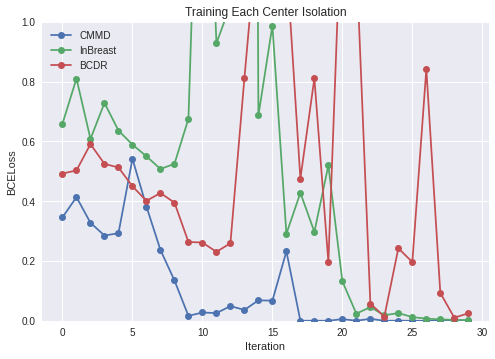

In [55]:
plt.plot(steps, cmmd_losses_local_round1,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local_round1,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local_round1,'-o', label='BCDR')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
# plt.savefig(exp_path.joinpath('./plots/learning_curve.png'))